# #Oakmont real estate price predictor


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv") 

In [3]:
 housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287998,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705255,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
# housing.hist(bins =50, figsize = (20,15))

# # train test split

In [6]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)      ## we dont want the program to read our whole we want that it should read only the traning data thats why we limit the randomness of spliting the data.
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices= shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [8]:
# train_set,test_set=split_train_test(housing,0.2)

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)})\nRows in test set:{len(test_set)}\n")

Rows in train set:404)
Rows in test set:102



## we need to stratigically split the CHAS because it has a lot of same values so our model may have taken all inputs for training from that very pool

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=22)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [12]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
housing = strat_train_set.copy()


## Looking for correlations

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.715230
ZN         0.382128
B          0.338725
DIS        0.255095
CHAS       0.226922
RAD       -0.373183
CRIM      -0.379507
AGE       -0.389502
NOX       -0.433369
TAX       -0.458797
INDUS     -0.467674
PTRATIO   -0.497818
LSTAT     -0.732722
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

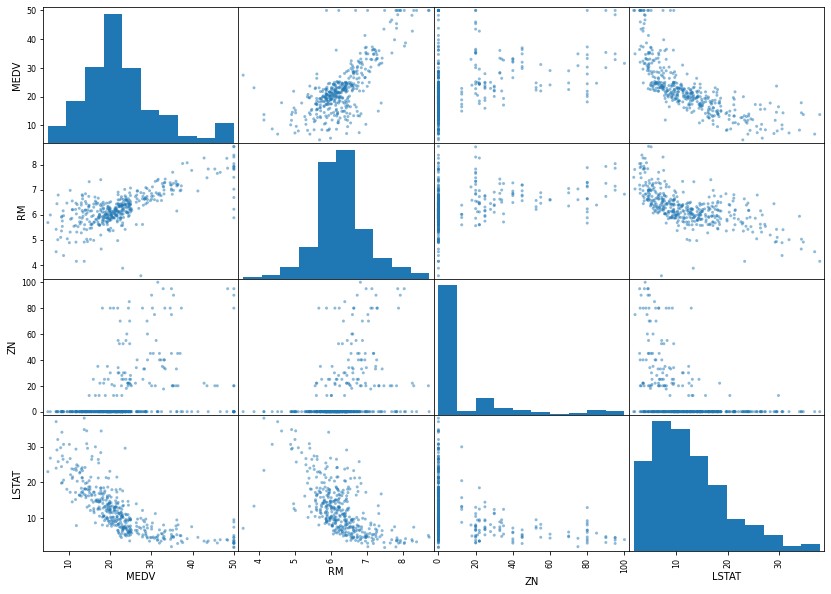

In [15]:
from pandas.plotting import scatter_matrix
attributes= ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(14,10))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

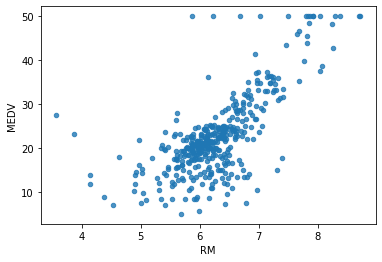

In [16]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=.8)

## Trying out Attribute combinations

In [17]:
housing["TRM"]=housing["TAX"]/housing["RM"]

In [18]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TRM
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,107.211848
149,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4,72.002859
123,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188,19.1,370.31,25.41,17.3,32.103825
462,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,396.90,13.99,19.5,105.429793
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1,38.080601


In [19]:
corr_matrix["MEDV"].sort_values(ascending=False)


MEDV       1.000000
RM         0.715230
ZN         0.382128
B          0.338725
DIS        0.255095
CHAS       0.226922
RAD       -0.373183
CRIM      -0.379507
AGE       -0.389502
NOX       -0.433369
TAX       -0.458797
INDUS     -0.467674
PTRATIO   -0.497818
LSTAT     -0.732722
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TRM', ylabel='MEDV'>

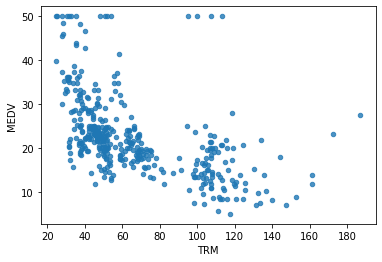

In [20]:
corr_matrix = housing.corr()
housing.plot(kind='scatter',x='TRM',y='MEDV',alpha=.8)


In [21]:
##  we did this to drop lables and copied them to differnet variable
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Missing attributes

## through direct code

In [22]:
# to take care of missing attributes we have three options
# 1.Get rid of missing data points
# 2.Get rid of the whole attributes
# 3. Set the missing value to zero,mean,median

In [23]:
#  a=housing.dropna(subset=["RM"])

# a.shape

In [24]:
# housing.drop("RM",axis=1).shape

In [25]:
# median= housing["RM"].median()


In [26]:
# median

In [27]:
# housing["RM"].fillna(median)

In [28]:
# housing.shape


In [29]:
housing.describe() #before imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.434292,11.090347,11.125322,0.069307,0.552885,6.282745,67.772525,3.832385,9.150990,400.594059,18.387871,358.939307,12.416139
std,8.718778,22.671046,6.919164,0.254290,0.116622,0.706880,28.356332,2.087485,8.474424,165.494757,2.161443,88.010900,7.138824
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081960,0.000000,5.175000,0.000000,0.448000,5.886500,42.375000,2.102875,4.000000,277.000000,17.000000,375.300000,6.922500
50%,0.250895,0.000000,9.690000,0.000000,0.535000,6.214000,74.850000,3.347500,5.000000,329.000000,18.750000,391.880000,10.925000
75%,2.660102,12.500000,18.100000,0.000000,0.624000,6.620500,94.100000,5.212575,8.000000,494.250000,20.200000,396.215000,16.312500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## dealing with missing values through sklearn library

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.50895e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.35000e-01,
       6.21400e+00, 7.48500e+01, 3.34750e+00, 5.00000e+00, 3.29000e+02,
       1.87500e+01, 3.91880e+02, 1.09250e+01])

In [32]:
X=imputer.transform(housing)

In [33]:
housing_=pd.DataFrame(X,columns=housing.columns)

In [34]:
housing_.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.434292,11.090347,11.125322,0.069307,0.552885,6.282064,67.772525,3.832385,9.150990,400.594059,18.387871,358.939307,12.416139
std,8.718778,22.671046,6.919164,0.254290,0.116622,0.703396,28.356332,2.087485,8.474424,165.494757,2.161443,88.010900,7.138824
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081960,0.000000,5.175000,0.000000,0.448000,5.887750,42.375000,2.102875,4.000000,277.000000,17.000000,375.300000,6.922500
50%,0.250895,0.000000,9.690000,0.000000,0.535000,6.214000,74.850000,3.347500,5.000000,329.000000,18.750000,391.880000,10.925000
75%,2.660102,12.500000,18.100000,0.000000,0.624000,6.618250,94.100000,5.212575,8.000000,494.250000,20.200000,396.215000,16.312500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# # Scikit learn design

Primarily, three types of objects

Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature scaling

we do feature scaling to bring all numericals attributes(values) under same range example like from 1 to 10

primarily two types
1.Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this

# #Creating a Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
    # add as manu=y as you want to your pipeline
])

In [36]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr.shape

(404, 13)

## selecting the desired model for Oakmont Real Estate

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model= LinearRegression()
# model= DecisionTreeRegressor()
model= RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [51]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [52]:
prepared_data=my_pipeline.transform(some_data)

In [53]:
model.predict(prepared_data)

array([16.211, 15.235, 16.918, 19.661, 21.517])

In [54]:
some_labels

356    17.8
149    15.4
123    17.3
462    19.5
270    21.1
Name: MEDV, dtype: float64

## Evaluating model

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error

housing_prediction=model.predict(housing_num_tr)

mse=mean_squared_error(housing_labels,housing_prediction)

rmse=np.sqrt(mse)

In [56]:
rmse

1.1418590636707873

# to get rid of over fitting we need to use better evaluation techniques--
# Cross validation

In [57]:
#  1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score

scores= cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [58]:
rmse_scores

array([3.46089363, 3.17332587, 2.19502789, 2.06063238, 3.93210232,
       2.52841973, 3.4321549 , 3.14219835, 3.85739808, 3.10409748])

In [59]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean",scores.mean())
    print("Standard deviation",scores.std())

In [60]:
print_scores(rmse_scores)

Scores: [3.46089363 3.17332587 2.19502789 2.06063238 3.93210232 2.52841973
 3.4321549  3.14219835 3.85739808 3.10409748]
Mean 3.088625063564839
Standard deviation 0.6114295597999353


# Saving the Model

In [61]:
from joblib import dump,load
dump(model,'Oakmont.joblib')

['Oakmont.joblib']

## Testing the model

In [64]:
X_test = strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_preditions = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_preditions)
final_rmse = np.sqrt(final_mse)
print(final_preditions,list(y_test))

[32.825 18.515 15.858 26.459 13.249 20.021 24.035 21.562 25.223  9.089
 19.421 16.076 27.455 24.642 30.726 15.916 19.478 39.523 15.316 31.771
 20.353 17.382 15.031 24.049 30.284 20.914 21.76  19.332 11.591 14.531
 25.715 12.816  9.896 25.51  14.808 30.754  7.713 19.934 15.89  24.384
 43.098 14.944 20.208 11.781 31.373 20.444 22.503 21.983 20.555 14.14
 14.437 19.552 22.109 14.029 20.337 41.257 18.922 14.293 45.577 19.299
 20.619 21.177 23.81  18.632 20.793 35.506 12.258 11.534 16.146 24.216
 20.522 32.121 27.402 14.757 14.94  20.034 14.053 10.965 15.026 23.642
 12.637 46.201 23.564 18.11  34.961 18.682 16.823 13.009 21.286 24.42
  6.734 24.585 20.676 23.078 20.484 14.042 28.492 12.861 19.559 41.559
 47.73  44.724] [33.8, 20.4, 15.6, 25.1, 15.4, 16.8, 29.8, 22.4, 15.0, 7.2, 16.6, 27.5, 29.4, 27.5, 32.2, 15.2, 23.8, 50.0, 19.0, 31.6, 20.8, 27.1, 14.8, 24.2, 31.1, 24.3, 20.5, 23.2, 10.2, 12.7, 29.6, 17.1, 7.2, 23.5, 13.6, 26.6, 10.5, 21.7, 14.3, 22.2, 43.1, 13.8, 19.3, 13.9, 33.2, 19.7, 2

In [65]:
final_rmse


3.7098320663857964

In [68]:
prepared_data[0]

array([ 0.63719337, -0.48979204,  1.0092731 ,  3.66450153,  1.86400988,
       -0.09973213,  1.04612301, -0.8202719 ,  1.75438735,  1.60570056,
        0.83942777,  0.21376889,  0.72705102])

## using the model

In [75]:
from joblib import dump,load
model = load('Oakmont.joblib')
features= np.array([[ 55343.63719337, -0.48979204,  1.0092731 ,  3.66450153,  1.86400988,
       -0.09973213,  5555.04612301, -98451.8202719 ,  99.75438735,  1.60570056,
        516.83942777,  5464835684.21376889,  0.72705102]])
model.predict(features)


array([9.014])